# Sales Analysis Project

In [1]:
# importing libraries
import pandas as pd
import os
from matplotlib import pyplot as plt
from itertools import combinations
from collections import Counter

In [3]:
#whole year data is stored in Output Folder
all_month_data = pd.DataFrame();

for files in os.listdir("./Sales_Data"):
    df = pd.read_csv(f"./Sales_Data/{files}")
    all_month_data = pd.concat([all_month_data,df]);
    
    
all_month_data.to_csv("./Output/whole_data.csv",index=False)

In [5]:
# extract data from ./Output/whole_data.csv
all_data = pd.read_csv("./Output/whole_data.csv")

all_data.head()
# all_data is the actual dataframe to be used further

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
# drop all NAN values
all_data = all_data.dropna()

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
#creating a new Month column in which the order is placed
all_data["Month Of Order"] = all_data["Order Date"].str[0:2]

#2) drop all rows that consists some values that are inappropiate

all_data = all_data.loc[all_data["Month Of Order"]!="Or"]

all_data["Month Of Order"] = all_data["Month Of Order"].astype('int16')

#creating a sales column that demonstrate the total amount of purchase on that order

all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype("int16")
all_data["Price Each"] = all_data["Price Each"].astype("float64")

all_data["Sale Amount"] = all_data["Quantity Ordered"]*all_data["Price Each"]

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Of Order,Sale Amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Q1) On which month the sales is highest ?

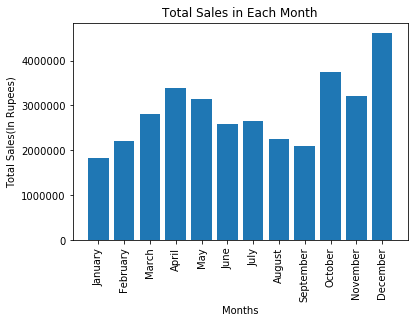

In [8]:
Total_Sales = all_data.groupby("Month Of Order").sum().loc[:,"Sale Amount"]

months = [i for i in range(1,13)]

month_name = ["January","February","March","April","May","June","July","August","September","October","November","December"]

plt.bar(months,Total_Sales)

plt.title("Total Sales in Each Month")

plt.xticks(months,month_name,rotation="vertical")

plt.xlabel("Months")
plt.ylabel("Total Sales(In Rupees)")

plt.show()

### Q2) On which month maximum number of orders are placed ?

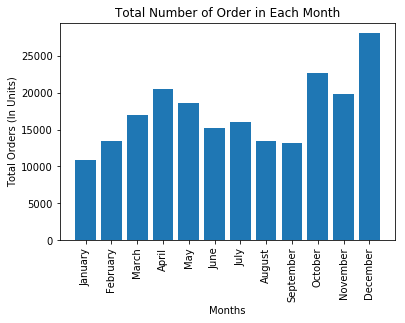

In [9]:
Total_Order = all_data.groupby("Month Of Order").sum().loc[:,"Quantity Ordered"]

plt.bar(months,Total_Order)

plt.title("Total Number of Order in Each Month")

plt.xticks(months,month_name,rotation="vertical")

plt.xlabel("Months")
plt.ylabel("Total Orders (In Units)")

plt.show()

### Q3) From which state maximum orders were placed ?

In [12]:
def extractState(a):
    return a.split(", ")[1] +"["+a.split(", ")[2].split(" ")[0]+"]"

# create a state column upon extracting sates with code from the "Purchase Address"
all_data["State"] = all_data["Purchase Address"].apply(extractState)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Of Order,Sale Amount,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas[TX]
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston[MA]
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles[CA]
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA]
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA]


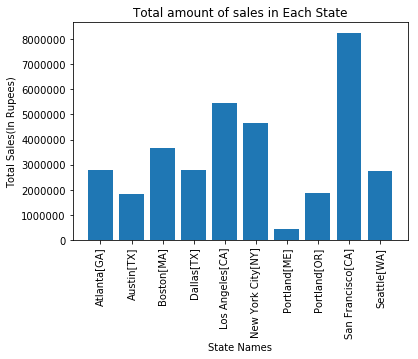

In [13]:
Total_Sales_per_State = all_data.groupby("State").sum().loc[:,"Sale Amount"]

State_Name = Total_Sales_per_State.keys()

xVals = [i for i in range(0,len(State_Name))]

plt.bar(xVals,Total_Sales_per_State)

plt.xticks(xVals,State_Name,rotation ='vertical')

plt.title("Total amount of sales in Each State")

plt.xlabel("State Names")
plt.ylabel("Total Sales(In Rupees)")

plt.show()

### Q4) What is the time of maximum orders so far we can advertise our products at that time to accelerate our businesss ?

In [14]:
#changing the datatype of "Order date" to datetime

all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

# creating Hour and Minute column

all_data["Hours(24)"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Of Order,Sale Amount,State,Hours(24),Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas[TX],8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston[MA],22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles[CA],14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA],14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA],9,27


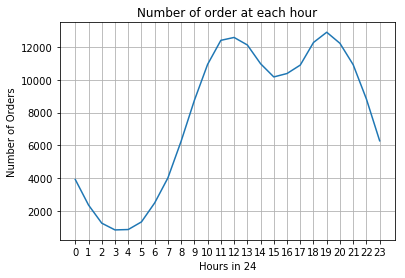

In [15]:
No_of_Orders = all_data.groupby("Hours(24)").count()["Order ID"]

Hours = No_of_Orders.keys()

plt.plot(Hours,No_of_Orders)

plt.grid()

plt.title("Number of order at each hour")

plt.xticks(Hours)

plt.xlabel("Hours in 24")
plt.ylabel("Number of Orders")

plt.show()

### Q5) Which product sales in largest amount ?

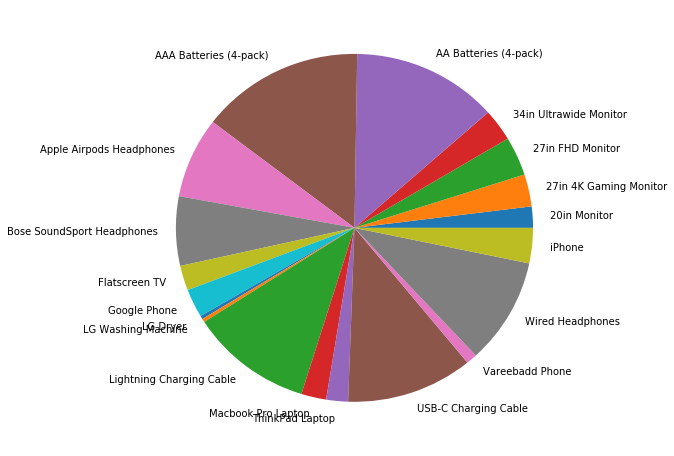

In [17]:
quantity = all_data.groupby("Product").sum()["Quantity Ordered"].astype("int64")

item = quantity.keys()

fig = plt.figure(figsize=(8, 8))
plt.pie(quantity,labels=item)


plt.show()

### Q6) Find the products that most often ordered together ? 

In [19]:
#creating a new dataframe that consists those products that ordered together
together_orders = all_data[all_data.duplicated("Order ID", keep=False) == True]

# joining individual "Products" having same "Order ID"
together_orders["Ordered Products"] = together_orders.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))

# remove duplicates
together_orders = together_orders.loc[:,["Order ID","Ordered Products"]].drop_duplicates()

together_orders.head()

C:\Users\user\Anaconda3\envs\Pandas\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Order ID,Ordered Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [20]:
count = Counter()

for row in together_orders["Ordered Products"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
l = count.most_common()
pair_orders = pd.DataFrame(l,columns=["Pair-Items","Quantity"])

pair_orders.head()

,Pair-Items,Quantity
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361
